# Advanced fMRI data analysis 
## General Linear Model 2


In this assignment, your task is to run simple GLM analysis on fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 22-05-2020

-------------------

## Task 1



Repeat all analyses performed on our last classes (code [HERE](https://github.com/fMRIAnalysisCourse/fmri-analysis-course/blob/master/04-general_linear_model/glm_on_fMRI_data.ipynb)) on the second subject in our dataset (`sub-02`). Explore different plotting possibilities available at `plot_stat_map` method (documentation [HERE](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_stat_map.html)). Also check tutorial [HERE](https://nilearn.github.io/auto_examples/01_plotting/plot_demo_more_plotting.html#sphx-glr-auto-examples-01-plotting-plot-demo-more-plotting-py).



In [10]:
# Code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nistats
from nistats.first_level_model import FirstLevelModel
from nistats.first_level_model import FirstLevelModel
from nistats.reporting import plot_design_matrix
from nistats.reporting import plot_contrast_matrix
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show
from nistats.thresholding import map_threshold
from nistats.reporting import get_clusters_table

events_path = "fMRI_BIDS_rhymejudgment/sub-02/func/sub-02_task-rhymejudgment_events.tsv"
events = pd.read_csv(events_path, sep="\t")
print(events.head())


fmri_img = "fMRI_BIDS_rhymejudgment/derivatives/fmriprep/sub-02/func/sub-02_task-rhymejudgment_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
confounds_path = "fMRI_BIDS_rhymejudgment/derivatives/fmriprep/sub-02/func/sub-02_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, sep="\t")
motion = confounds[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]]



    onset  duration  trial_type
0  20.001       2.0  pseudoword
1  22.501       2.0  pseudoword
2  25.001       2.0  pseudoword
3  27.501       2.0  pseudoword
4  30.001       2.0  pseudoword


In [11]:
t_r = 2
first_level_model = FirstLevelModel(t_r, 
                                    hrf_model='spm', 
                                    high_pass=.01,
                                    smoothing_fwhm=6)

first_level_model = first_level_model.fit(fmri_img, events=events)

In [12]:
design_matrix = first_level_model.design_matrices_[0]
design_matrix.head()

,pseudoword,word,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.111798,0.111782,0.111755,0.111717,0.111669,0.111609,1.0
2.0,0.0,0.0,0.111755,0.111609,0.111367,0.111028,0.110593,0.110062,1.0
4.0,0.0,0.0,0.111669,0.111265,0.110593,0.109655,0.108453,0.106989,1.0
6.0,0.0,0.0,0.111539,0.110749,0.109436,0.107606,0.105268,0.102433,1.0
8.0,0.0,0.0,0.111367,0.110062,0.107899,0.104893,0.101069,0.096457,1.0


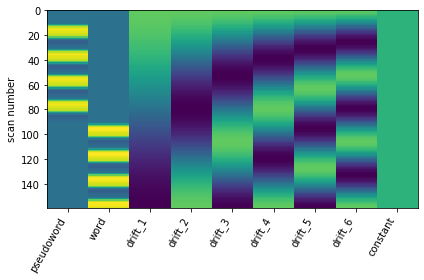

In [13]:

plot_design_matrix(design_matrix)


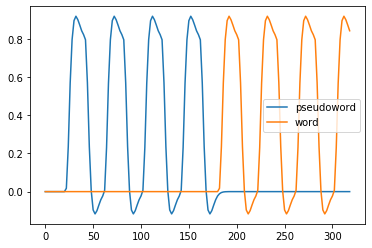

In [14]:
plt.plot(design_matrix[['pseudoword', 'word']])
plt.legend(['pseudoword', 'word'])


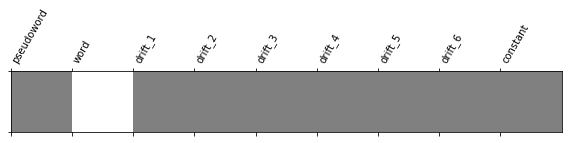

In [15]:
conditions = {'pseudoword': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0]), 
              'word': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0])}

word_minus_pseudoword = conditions['word'] - conditions['pseudoword']
word_effect = conditions['word']

plot_contrast_matrix(word_effect, design_matrix=design_matrix)

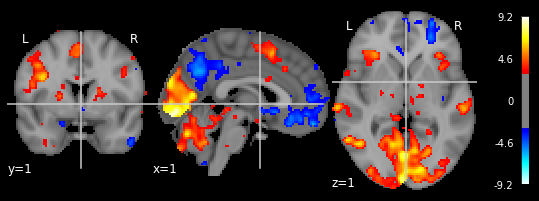

In [16]:
z_map = first_level_model.compute_contrast(word_effect,
                                  output_type='z_score')
plot_stat_map(z_map, threshold=3,
              display_mode='ortho', cut_coords=(1,1,1), black_bg=True, annotate = True, draw_cross = True)
plt.show()

Uncorrected p<0.001 threshold: 5.168


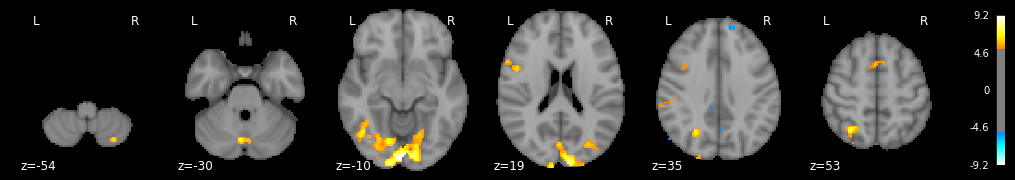

In [17]:
_, threshold = map_threshold(z_map, alpha=.05, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(z_map, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

In [18]:
table = get_clusters_table(z_map, stat_threshold=threshold,
                           cluster_threshold=20)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-2.5,-90.5,-10.5,9.157358,25688
1,1a,-14.5,-94.5,-14.5,8.603333,
2,1b,9.5,-96.5,19.5,8.485374,
3,1c,11.5,-88.5,-10.5,8.338114,
4,2,-46.5,-42.5,-20.5,8.259308,768
5,3,-44.5,-56.5,-2.5,7.938416,5480
6,3a,-16.5,-72.5,-14.5,7.535024,
7,3b,-44.5,-62.5,-12.5,7.399134,
8,3c,-16.5,-72.5,-10.5,7.358865,
9,4,-28.5,-60.5,53.5,7.746038,2152


In [19]:
first_level_model_motion = first_level_model.fit(fmri_img, events=events, confounds=motion)

design_matrix_motion = first_level_model.design_matrices_[0]
design_matrix_motion.head()

,pseudoword,word,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.111798,0.111782,0.111755,0.111717,0.111669,0.111609,1.0
2.0,0.0,0.0,0.018734,-0.000013,0.029539,-0.000250,0.000781,0.000226,0.111755,0.111609,0.111367,0.111028,0.110593,0.110062,1.0
4.0,0.0,0.0,0.016760,0.023149,0.060931,-0.000207,0.001009,0.000333,0.111669,0.111265,0.110593,0.109655,0.108453,0.106989,1.0
6.0,0.0,0.0,-0.004947,0.023730,0.034745,-0.000811,0.001009,0.000000,0.111539,0.110749,0.109436,0.107606,0.105268,0.102433,1.0
8.0,0.0,0.0,-0.002534,0.012633,0.060961,-0.000524,0.000959,0.000000,0.111367,0.110062,0.107899,0.104893,0.101069,0.096457,1.0


In [20]:
conditions_motion = {'pseudoword': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                     'word': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
                     'trans_y': np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

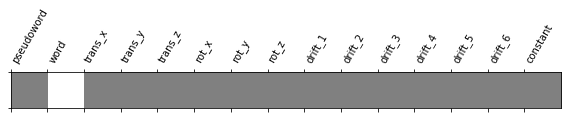

In [21]:
word_minus_pseudoword_motion = conditions_motion['word'] - conditions_motion['pseudoword']
word_effect_motion = conditions_motion['word']
trans_y = conditions_motion['trans_y']

plot_contrast_matrix(word_effect_motion, design_matrix=design_matrix_motion)

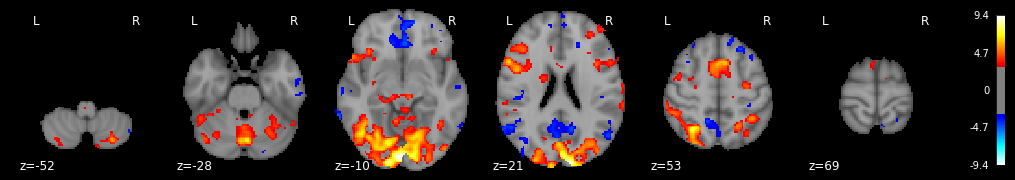

In [22]:
z_map_motion = first_level_model.compute_contrast(word_effect_motion,
                                  output_type='z_score')
plot_stat_map(z_map_motion, threshold=3,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

Uncorrected p<0.001 threshold: 5.168


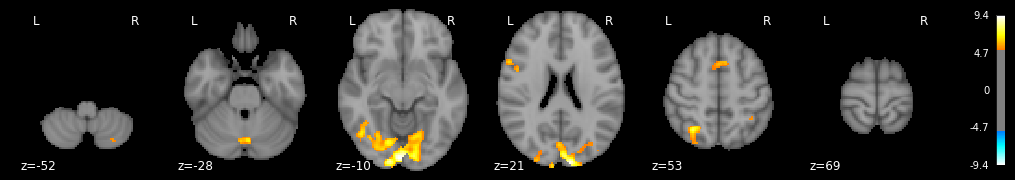

In [23]:
_, threshold = map_threshold(z_map_motion, alpha=.05, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(z_map_motion, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

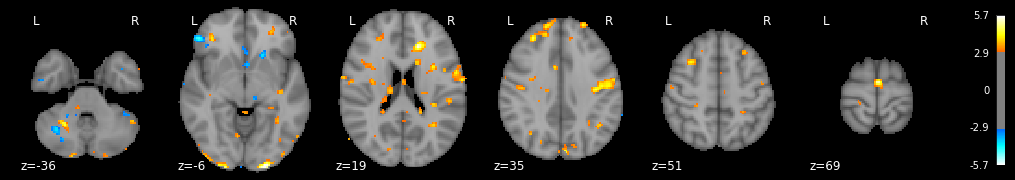

In [24]:
z_map_motion_trans = first_level_model.compute_contrast(trans_y,
                                  output_type='z_score')
plot_stat_map(z_map_motion_trans, threshold=3,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()